In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

## Reading data

In [286]:
data = pd.read_csv('D:\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv' )
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [287]:
#changing Select to nan
data.replace('Select', np.nan, inplace = True)

### Analysing the data

In [288]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<Figure size 1500x1000 with 0 Axes>

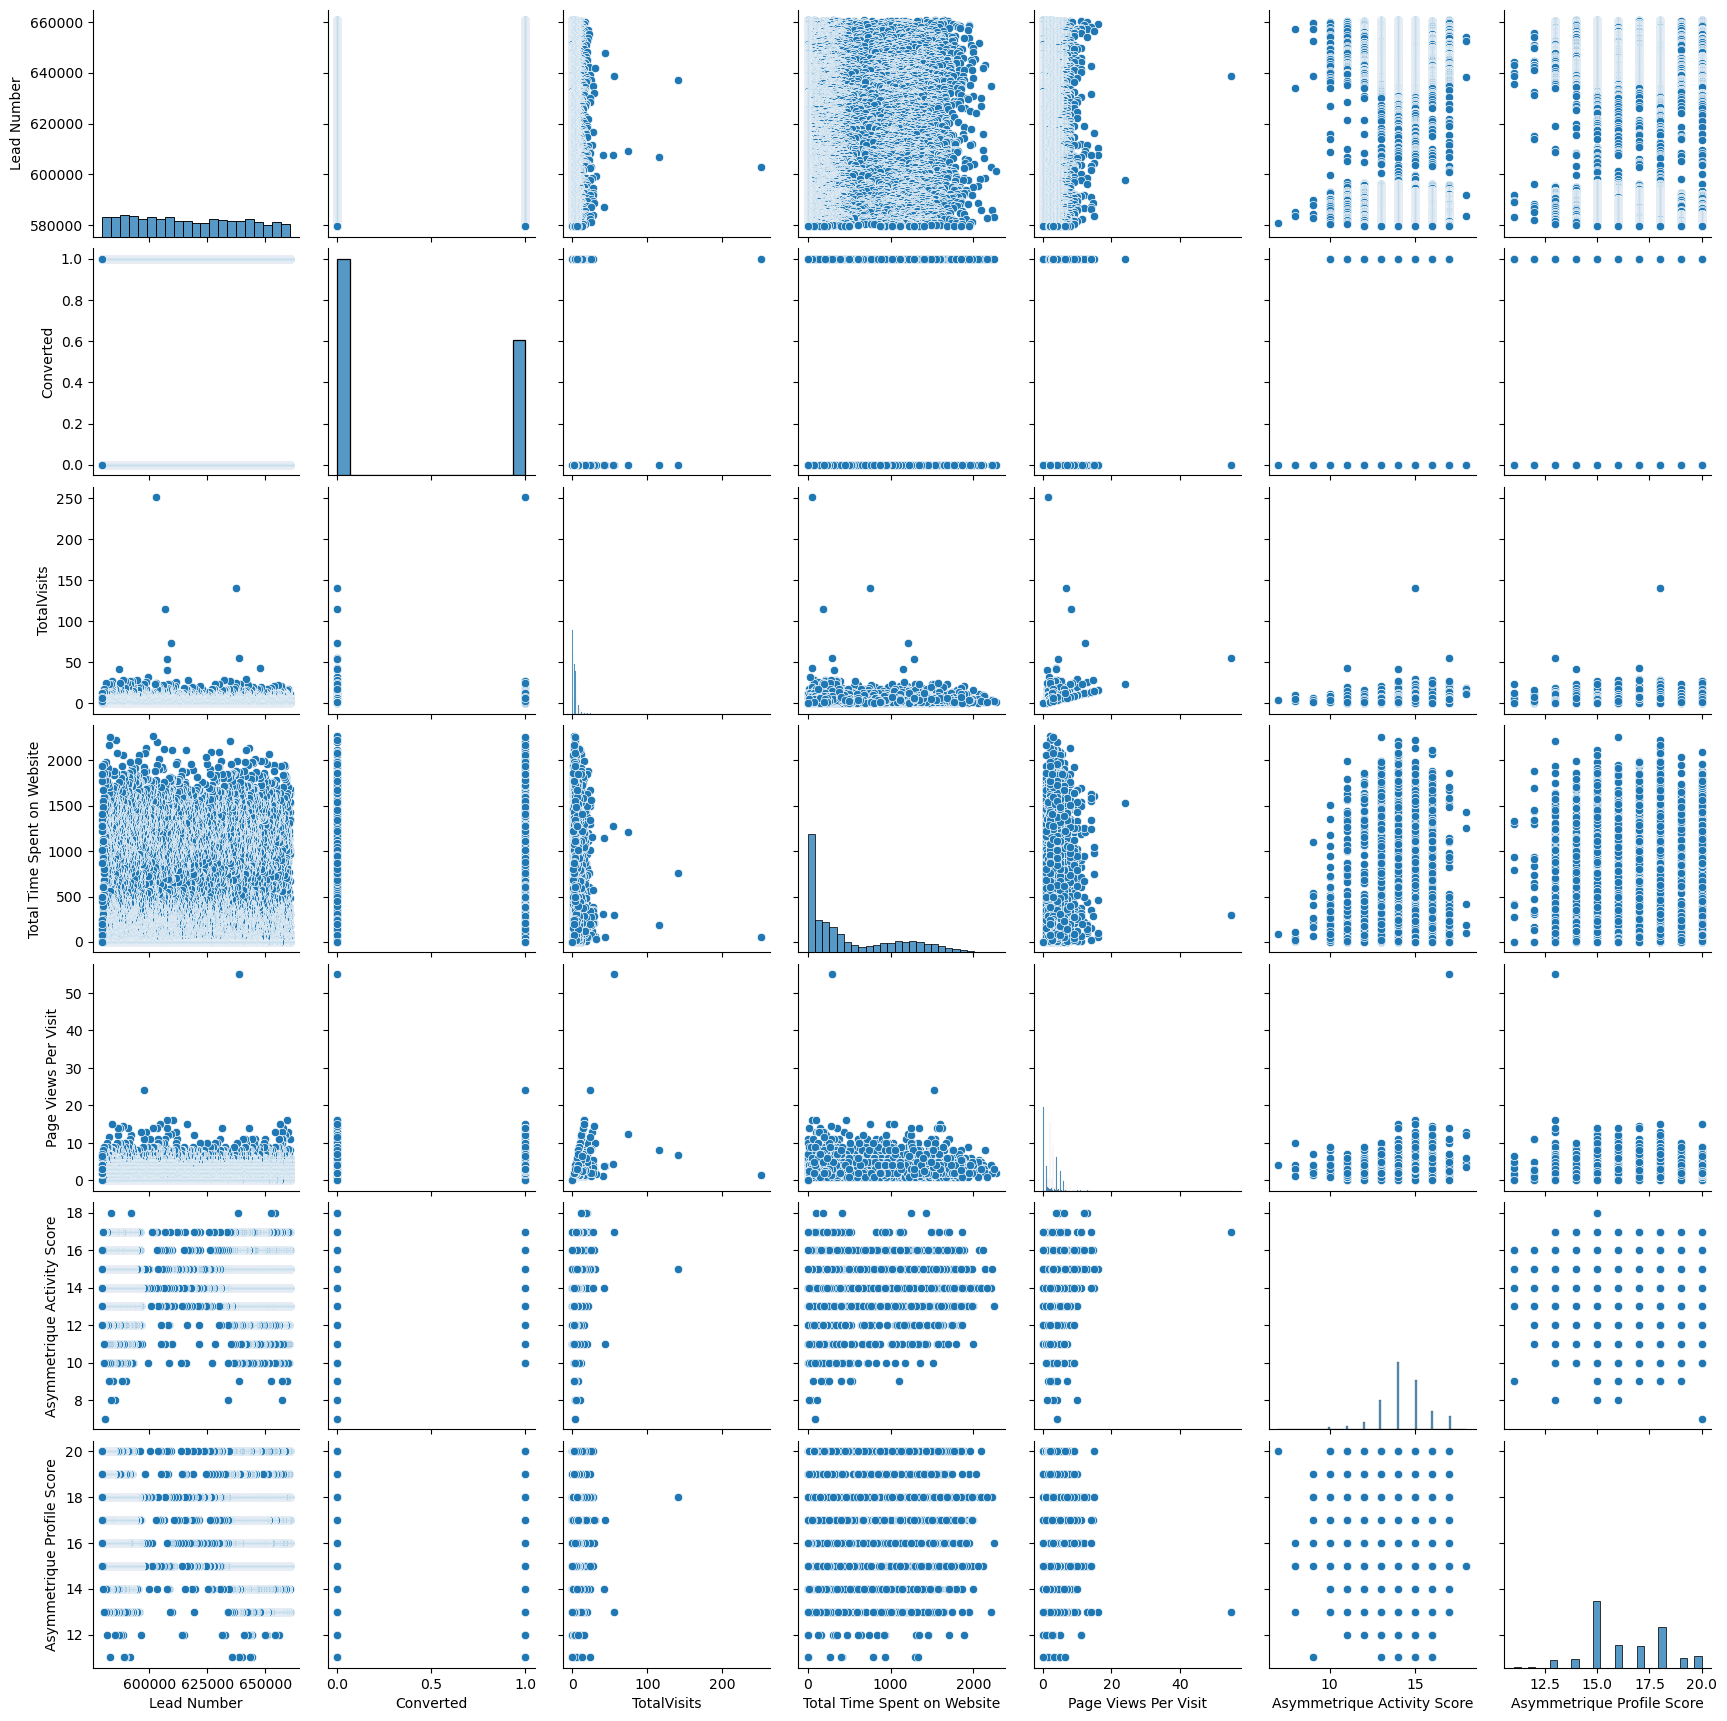

In [290]:
#checking for correlation pattern
plt.figure(figsize= (15,10))
sns.pairplot(data)
plt.show()

## EDA

### Checking objective columns

In [291]:
obj_col = data.select_dtypes(include=['object']).columns
obj_col

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [292]:
obj_col = ['Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

Checking the count of categories

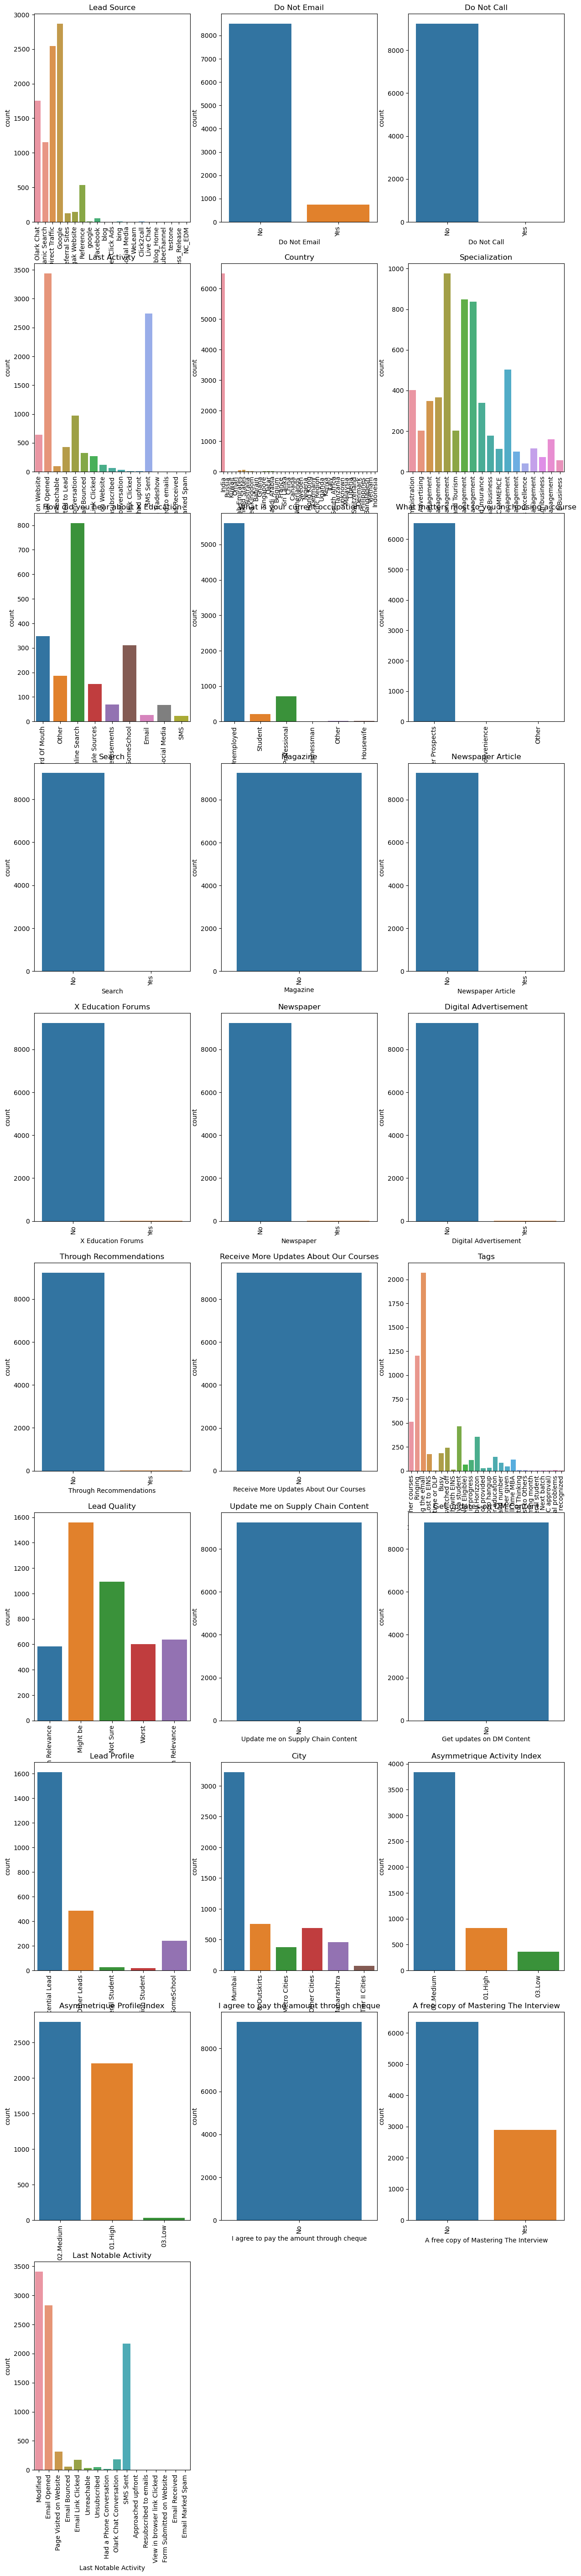

In [293]:
plt.figure(figsize= (15,70))
for i in range(len(obj_col[:30])):
    plt.subplot(10,3,i+1)
    sns.countplot(x = data[obj_col[i]])
    plt.title(obj_col[i])
    plt.xticks(rotation = 90)
plt.show()

Dropping columns as they have high data imbalance

In [294]:
data = data.drop(['Magazine', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'X Education Forums', 'Newspaper', 'Do Not Call'], axis = 1)

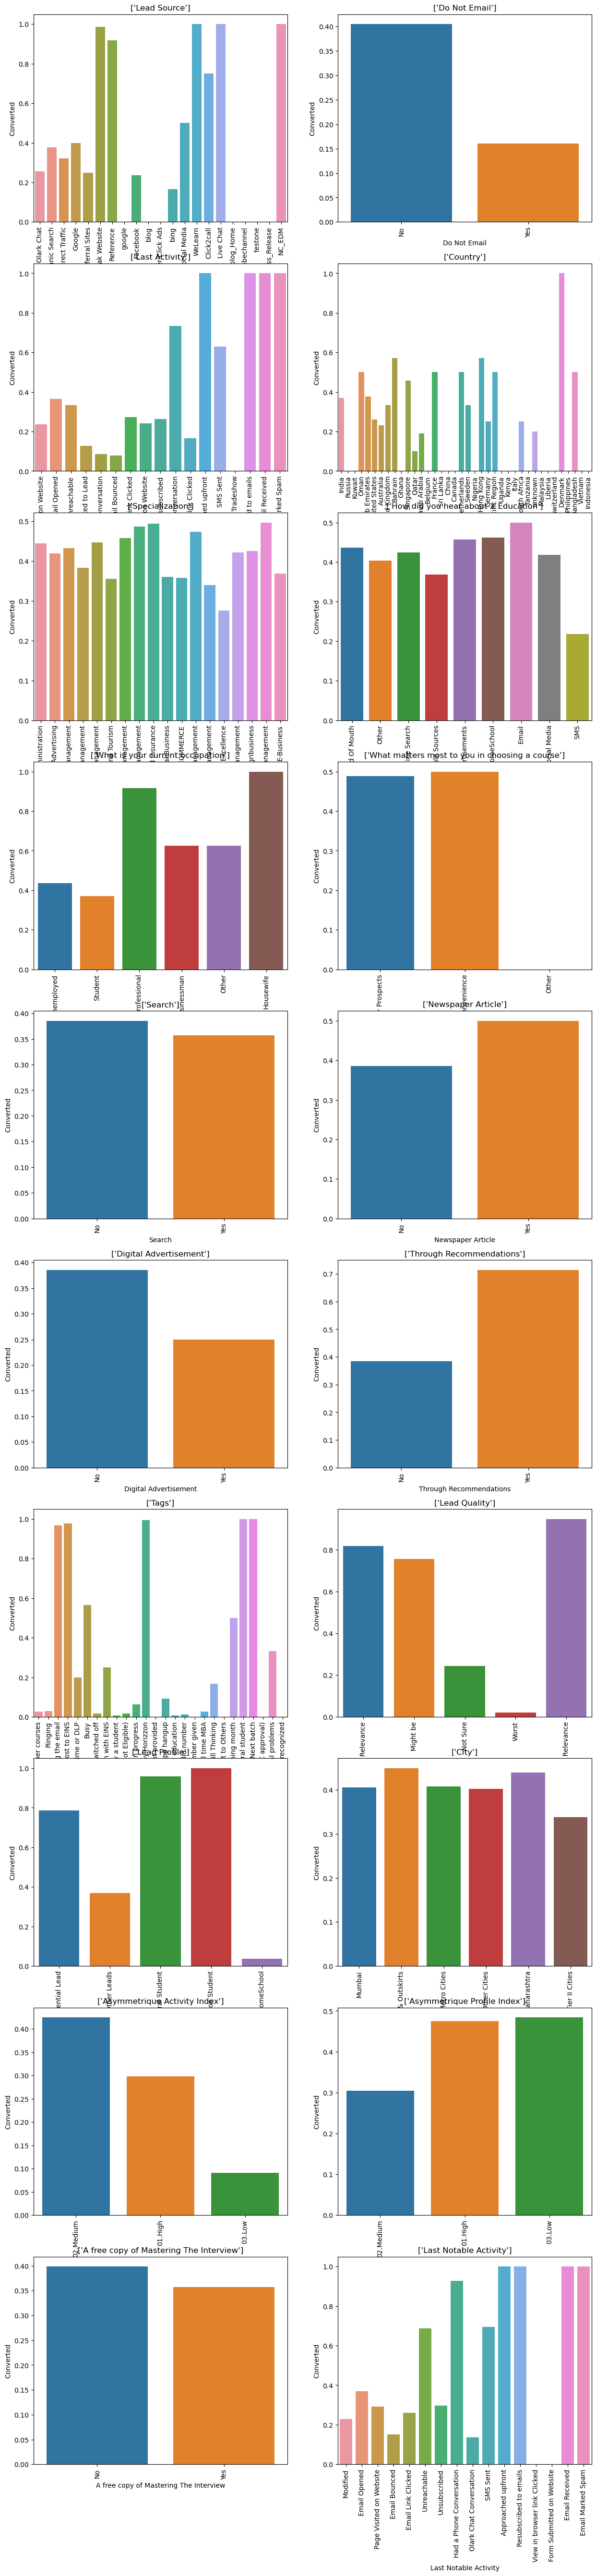

In [295]:
obj_col = ['Lead Source', 'Do Not Email',
        'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 
       'Digital Advertisement', 'Through Recommendations',
       'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

plt.figure(figsize= (15,100))
for i in range(len(obj_col[:30])):
    plt.subplot(15,2,i+1)
    sns.barplot(x = data[obj_col[i]], y = data.Converted, estimator = 'mean', errorbar = None)
    plt.title([obj_col[i]])
    plt.xticks(rotation = 90)
plt.show()

### Checking numerical columns

In [296]:
obj_col = data.select_dtypes(include=['int64', 'float64']).columns
obj_col

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [297]:
obj_col = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

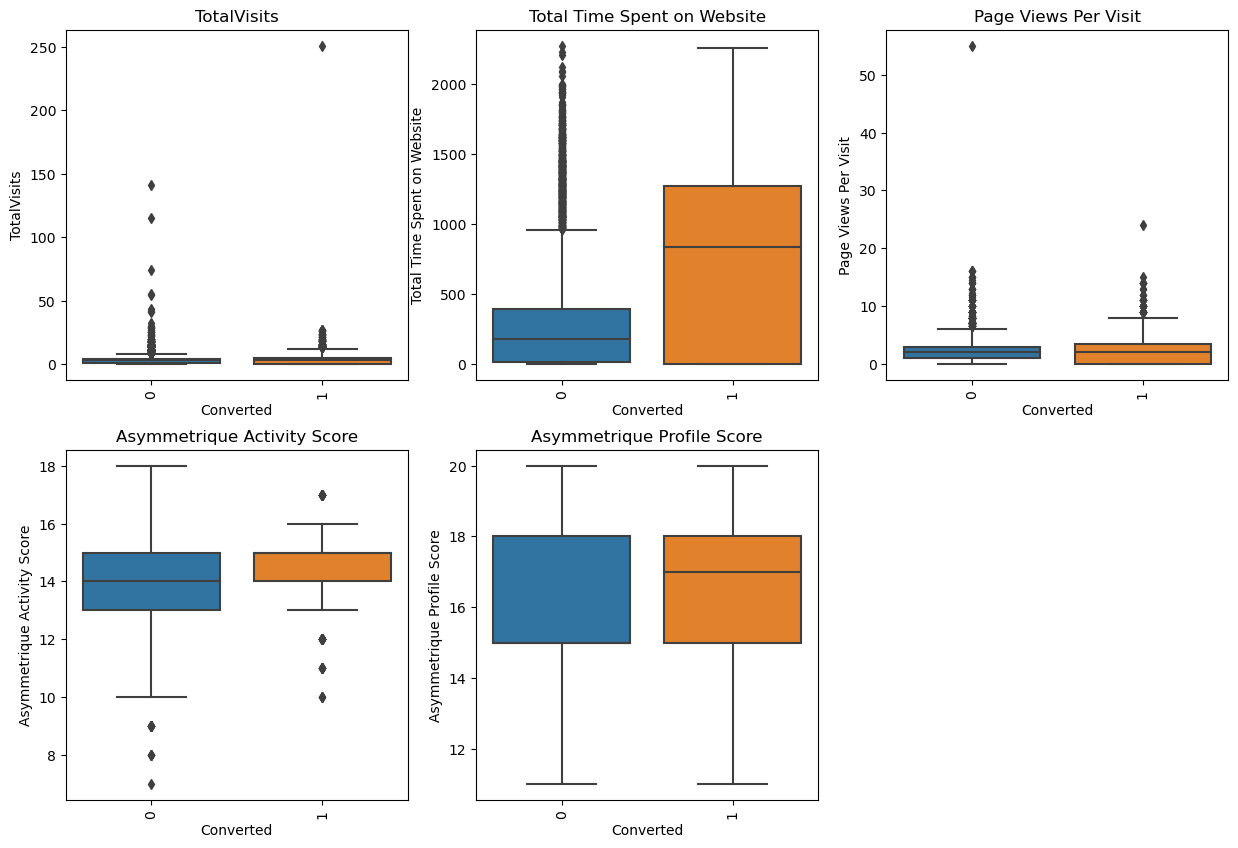

In [298]:
plt.figure(figsize= (15,10))
for i in range(len(obj_col[:30])):
    plt.subplot(2,3,i+1)
    sns.boxplot(y = data[obj_col[i]], x = data.Converted)
    plt.title(obj_col[i])
    plt.xticks(rotation = 90)
plt.show()

Removing outliers

In [299]:
#removing outliers from total visits and pages view per visit
data.TotalVisits  = data.TotalVisits[data.TotalVisits < 50]
data['Page Views Per Visit']  = data['Page Views Per Visit'][data.TotalVisits < 20]

## Data preparation for modelling

### Covert Obj columns to numerical for modelling

In [300]:
data.head(6)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,NaN,NaN,NaN,NaN,01.High,02.Medium,17.0,15.0,No,Modified


In [301]:
#checking for null values
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       143
Total Time Spent on Website                         0
Page Views Per Visit                              196
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
Digital Advertisement                               0
Through Recommendations     

In [302]:
#dropping columns having high null values > 3000 also removing tags column as it shows high correlation with target variable
data = data[data.columns[data.isna().sum() < 3000]]
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       143
Total Time Spent on Website                         0
Page Views Per Visit                              196
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
Digital Advertisement                               0
Through Recommendations                             0
A free copy of Mastering The Interview              0
Last Notable Activity       

In [303]:
#changing Yes and No to binary
data.replace(['Yes', 'No'], [1, 0], inplace = True)

#filling nan
data['Country'] = data['Country'].fillna(data.Country.mode()[0])
data['What is your current occupation'] = data['What is your current occupation'].fillna(data['What is your current occupation'].mode()[0])
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna(data['What matters most to you in choosing a course'].mode()[0])


#creating a category of others for categories having count less than 100 and also changing variables to dummy variables
def dummy(data):
    for column in data.select_dtypes(include=['object']).columns:
        data[column].where(data[column].map(data[column].value_counts()) > 100, 'Other', inplace= True)
        dummies = pd.get_dummies(data[column], prefix= column,drop_first= True)
        data.drop(column, axis = 1, inplace = True)
        data = pd.concat([data, dummies], axis = 1)
    return data
        
data = dummy(data)

#dropping nan values as they are low in number
data.dropna(inplace = True)


#dropping Lead Number column
data = data.drop(['Lead Number'], axis = 1)


In [304]:
#scaling total time spent on website and Lead Quality columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']] = scaler.fit_transform(data[['Total Time Spent on Website',  'TotalVisits', 'Page Views Per Visit']])

In [305]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0.263158,0.296655,0.15625,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,1,0.105263,0.674296,0.12500,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0.052632,0.134243,0.06250,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0.105263,0.628521,0.06250,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Model building

In [306]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['Converted'])], data.Converted, test_size= 0.20)

In [307]:
X_train.head()

,A free copy of Mastering The Interview,Country_Other,Digital Advertisement,Do Not Email,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Newspaper Article,Page Views Per Visit,Search,Through Recommendations,Total Time Spent on Website,TotalVisits,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other
3163,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.15625,0,0,0.573504,0.263158,0,1,0,0
4057,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00000,0,0,0.000000,0.000000,0,1,0,0
2185,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.18750,0,0,0.116197,0.157895,0,1,0,0
6625,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.25000,0,0,0.136444,0.210526,0,1,0,0
6356,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.12500,0,0,0.246479,0.105263,0,1,0,0


In [308]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression( max_iter = 200)
rfe = RFE(estimator=logreg, n_features_to_select= 10)

In [309]:
rfe.fit(X_train, y_train)
print('Optimal number of features : %d' % rfe.n_features_)

Optimal number of features : 10


In [310]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('A free copy of Mastering The Interview', False, 29),
 ('Country_Other', False, 14),
 ('Digital Advertisement', False, 23),
 ('Do Not Email', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', False, 8),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', False, 9),
 ('Last Notable Activity_Email Opened', False, 27),
 ('Last Notable Activity_Modified', False, 22),
 ('Last Notable Activity_Olark Chat Conversation', False, 21),
 ('Last Notable Activity_Other', True, 1),
 ('Last Notable Activity_Page Visited on Website', False, 24),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Google', Fa

In [311]:
sel_col = X_train.columns[rfe.support_]
sel_col

Index(['Do Not Email', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Other', 'Last Notable Activity_SMS Sent',
       'Lead Origin_Lead Add Form', 'Lead Origin_Other',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Total Time Spent on Website',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 1

In [312]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[sel_col])
logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7235
Model:                            GLM   Df Residuals:                     7224
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2995.1
Date:                Fri, 24 Nov 2023   Deviance:                       5990.1
Time:                        17:23:57   Pearson chi2:                 7.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4764      0.068    -36.186      0.000      -2.611      -2.342
Do Not Email                                            -1.7852      0.177    -10.111      0.000      -2.131      -1.439
Last Activity_Olark Chat Conversation                   -1.5418      0.154     -9.982      0.000      -1.844      -1.239
Last Notable Activity_Other                              1.4472      0.260      5.569      0.000       0.938       1.957
Last Notable Activity_SMS Sent                           1.6686      0.075     22.131      0.000       1.521       1.816
Lead Origin_Lead Add Form                                4.4050      0.233     18.921      0.000       3.949       4.861
Lead Origin_Other                                        1.4612      0.472      3.095      0.002       0.536       2.387
Lead Source_Olark Chat                                   1.2804      0.097     13.169      0.000       1.090       1.471
Lead Source_Welingak Website                             1.6096      0.756      2.129      0.033       0.128       3.091
Total Time Spent on Website                              4.7112      0.157     30.038      0.000       4.404       5.019
What is your current occupation_Working Professional     2.8524      0.183     15.599      0.000       2.494       3.211
========================================================================================================================
"""

### removing variables having p value greater than 0.05

In [313]:
sel_col = X_train.columns[rfe.support_]
#sel_col = sel_col.difference(['Through Recommendations', 'Lead Profile_Student of SomeSchool'])

In [314]:
sel_col

Index(['Do Not Email', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Other', 'Last Notable Activity_SMS Sent',
       'Lead Origin_Lead Add Form', 'Lead Origin_Other',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Total Time Spent on Website',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 2

In [315]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[sel_col])
logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7235
Model:                            GLM   Df Residuals:                     7224
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2995.1
Date:                Fri, 24 Nov 2023   Deviance:                       5990.1
Time:                        17:23:58   Pearson chi2:                 7.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4764      0.068    -36.186      0.000      -2.611      -2.342
Do Not Email                                            -1.7852      0.177    -10.111      0.000      -2.131      -1.439
Last Activity_Olark Chat Conversation                   -1.5418      0.154     -9.982      0.000      -1.844      -1.239
Last Notable Activity_Other                              1.4472      0.260      5.569      0.000       0.938       1.957
Last Notable Activity_SMS Sent                           1.6686      0.075     22.131      0.000       1.521       1.816
Lead Origin_Lead Add Form                                4.4050      0.233     18.921      0.000       3.949       4.861
Lead Origin_Other                                        1.4612      0.472      3.095      0.002       0.536       2.387
Lead Source_Olark Chat                                   1.2804      0.097     13.169      0.000       1.090       1.471
Lead Source_Welingak Website                             1.6096      0.756      2.129      0.033       0.128       3.091
Total Time Spent on Website                              4.7112      0.157     30.038      0.000       4.404       5.019
What is your current occupation_Working Professional     2.8524      0.183     15.599      0.000       2.494       3.211
========================================================================================================================
"""

### Using variance inflation factor to eliminate recursive features

In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train[sel_col].columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train[sel_col].values, i) 
                          for i in range(len(X_train[sel_col].columns))] 

vif_data

,feature,VIF
0,Do Not Email,1.161263
1,Last Activity_Olark Chat Conversation,1.388112
2,Last Notable Activity_Other,1.140458
3,Last Notable Activity_SMS Sent,1.348738
4,Lead Origin_Lead Add Form,1.410645
5,Lead Origin_Other,1.000371
6,Lead Source_Olark Chat,1.410083
7,Lead Source_Welingak Website,1.289743
8,Total Time Spent on Website,1.307364
9,What is your current occupation_Working Profes...,1.172739


In [317]:
#removing variables having VIF > 5
features = vif_data['feature'][round(vif_data).VIF <= 5 ]
sel_col = list(features)
sel_col

['Do Not Email',
 'Last Activity_Olark Chat Conversation',
 'Last Notable Activity_Other',
 'Last Notable Activity_SMS Sent',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Other',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Total Time Spent on Website',
 'What is your current occupation_Working Professional']

### Model 3

In [318]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[sel_col])
logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7235
Model:                            GLM   Df Residuals:                     7224
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2995.1
Date:                Fri, 24 Nov 2023   Deviance:                       5990.1
Time:                        17:23:58   Pearson chi2:                 7.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4764      0.068    -36.186      0.000      -2.611      -2.342
Do Not Email                                            -1.7852      0.177    -10.111      0.000      -2.131      -1.439
Last Activity_Olark Chat Conversation                   -1.5418      0.154     -9.982      0.000      -1.844      -1.239
Last Notable Activity_Other                              1.4472      0.260      5.569      0.000       0.938       1.957
Last Notable Activity_SMS Sent                           1.6686      0.075     22.131      0.000       1.521       1.816
Lead Origin_Lead Add Form                                4.4050      0.233     18.921      0.000       3.949       4.861
Lead Origin_Other                                        1.4612      0.472      3.095      0.002       0.536       2.387
Lead Source_Olark Chat                                   1.2804      0.097     13.169      0.000       1.090       1.471
Lead Source_Welingak Website                             1.6096      0.756      2.129      0.033       0.128       3.091
Total Time Spent on Website                              4.7112      0.157     30.038      0.000       4.404       5.019
What is your current occupation_Working Professional     2.8524      0.183     15.599      0.000       2.494       3.211
========================================================================================================================
"""

Most significant variables in decreasing order:
1. Lead Origin_Lead Add Form
2. Total Time Spent on Website
3. TotalVisits
4. What is your current occupation_Working Professional
5. Lead Profile_Potential Lead
6. Lead Source_Olark Chat
7. Lead Source_Reference


In [319]:
y_predict = res.predict(X_train_sm)

In [320]:
res_df = pd.DataFrame({'Churn': y_train, 'Churn_prob': y_predict, })
res_df['predicted'] = res_df.Churn_prob.apply(lambda x: 1 if x > 0.4 else 0)
res_df.head()

,Churn,Churn_prob,predicted
3163,1,0.556138,1
4057,1,0.873089,1
2185,0,0.126864,0
6625,0,0.137811,0
6356,0,0.192826,0


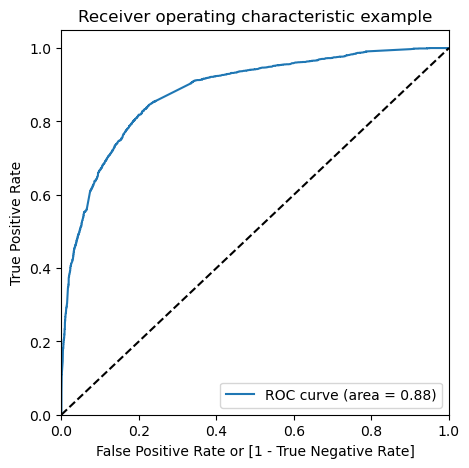

In [321]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(res_df.Churn, res_df.Churn_prob)

In [322]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    res_df['predicted'] = res_df.Churn_prob.apply(lambda x: 1 if x > i else 0)
    cm1 = metrics.confusion_matrix(res_df.Churn, res_df.predicted )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378438  1.000000  0.000000
0.1   0.1  0.595577  0.962016  0.372471
0.2   0.2  0.750242  0.912345  0.651545
0.3   0.3  0.802073  0.837473  0.780520
0.4   0.4  0.811472  0.765888  0.839226
0.5   0.5  0.812578  0.689189  0.887703
0.6   0.6  0.806634  0.620161  0.920169
0.7   0.7  0.782585  0.502922  0.952857
0.8   0.8  0.763511  0.422571  0.971092
0.9   0.9  0.716655  0.268444  0.989549


From the sensitivity and specificity tradeoff, cutoff of 0.4 is finalised to classify probabilities.

In [323]:
# Create confusion matrix
confusion = metrics.confusion_matrix(res_df.Churn, res_df.predicted)
confusion


array([[4450,   47],
       [2003,  735]], dtype=int64)

In [324]:
# Calculate accuracy
print((metrics.accuracy_score(res_df.Churn, res_df.predicted) * 100).round())

72.0


In [325]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP/(TP+FN)
specificity = TN/(TN + FP)
precision = TP/(TP+FP)

print('Sensitivity:',sensitivity, '\n', 'Specificity:', specificity, '\n', 'Precision:', precision)

Sensitivity: 0.26844411979547117 
 Specificity: 0.9895485879475205 
 Precision: 0.9398976982097187


### Checking on test data

In [326]:
X_test_sm = sm.add_constant(X_test[sel_col])
y_predict = res.predict(X_test_sm)

In [327]:
res_df = pd.DataFrame({'Churn': y_test, 'Churn_prob': y_predict, })
res_df['predicted'] = res_df.Churn_prob.apply(lambda x: 1 if x > 0.5 else 0)
res_df.head()

,Churn,Churn_prob,predicted
8958,0,0.339824,0
3826,0,0.708696,1
5439,1,0.975427,1
190,0,0.060779,0
2213,0,0.101571,0


In [328]:
# Create confusion matrix
confusion = metrics.confusion_matrix(res_df.Churn, res_df.predicted)
confusion


array([[956, 154],
       [228, 471]], dtype=int64)

In [329]:
# Calculate accuracy
print((metrics.accuracy_score(res_df.Churn, res_df.predicted) * 100).round())

79.0


In [330]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP/(TP+FN)
specificity = TN/(TN + FP)
precision = TP/(TP+FP)

print('Sensitivity:',sensitivity, '\n', 'Specificity:', specificity, '\n', 'Precision:', precision)

Sensitivity: 0.6738197424892703 
 Specificity: 0.8612612612612612 
 Precision: 0.7536


In [331]:
#model has around 88% and 91% accuracy on train and test data
